# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df_gf = pd.read_csv("01_source/xls_ch/gefaesspflanzen_ch.csv")

In [45]:
df_gf.head(1)

,ID_ISFS,GROUP,FAMILY,GENUS,SPECIES SSP,Scientific name,Deutscher Name,CAT,Criteria,Bemerkungen
0,100,Gymnosperma,Pinaceae,Abies,alba,Abies alba,Tanne,LC,NaN,NaN


In [46]:
df_gf.rename(columns={"GROUP":"group","FAMILY":"family","GENUS":"genus","SPECIES SSP":"species","Scientific name":"sc name","Deutscher Name":"dt name","CAT":"cat", "Criteria": "criteria", "Bemerkungen":"bemerkungen"},inplace=True)

In [47]:
len (df_gf)

2915

In [48]:
df_gf.pop("group")
df_gf.pop("family")
df_gf.pop("genus")
df_gf.pop("species")
df_gf.pop("bemerkungen")
df_gf.pop("criteria")
df_gf.pop("dt name")
df_gf.pop('ID_ISFS')

df_gf.head(1)

,sc name,cat
0,Abies alba,LC


In [49]:
df_gf['einteilung'] = 'Pflanzen'
df_gf['untergruppe'] = 'Gefässpflanzen'

df_gf.head(1)

,sc name,cat,einteilung,untergruppe
0,Abies alba,LC,Pflanzen,Gefässpflanzen


In [50]:
df_gf["cat"].value_counts()

LC        1643
NT         437
VU         368
EN         200
CR         113
DD          99
RE          35
CR(PE)      19
EX           1
Name: cat, dtype: int64

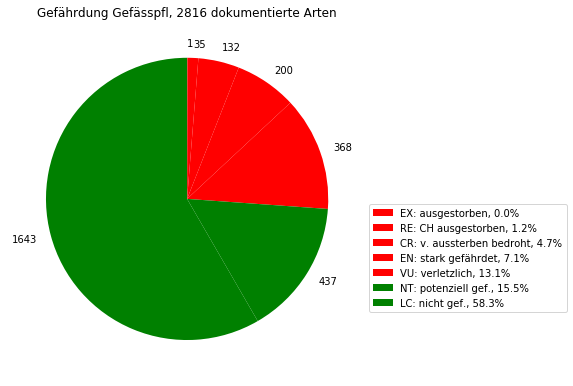

In [52]:
values = [1, 35, 132, 200, 368, 437, 1643]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef."]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Gefässpfl, 2816 dokumentierte Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [7]:
df_epf = pd.read_csv("01_source/tabula_ch/tabula_ epiphytische_flechten.csv")

In [8]:
df_epf.rename(columns={"Art":"sc name","CH":"cat"},inplace=True)
df_epf.head(1)

,sc name,cat
0,Acrocordia cavata (Ach.) R.C.Harris 1974,NT


In [9]:
df_epf['einteilung'] = 'Pflanzen'
df_epf['untergruppe'] = 'epiphytische Flechten'

df_epf.head(1)

,sc name,cat,einteilung,untergruppe
0,Acrocordia cavata (Ach.) R.C.Harris 1974,NT,Pflanzen,epiphytische Flechten


In [34]:
len (df_epf)

521

In [10]:
df_aa = pd.read_csv("01_source/tabula_ch/tabula_armleuchteralgen.csv")
df_aa.head(1)

,Wissenschaftlicher Name,Deutscher Name,Kat.,Kriterien der IUCN,Lebensraumtyp,Wassertiefe (m),Höhenstufen,Bemerkungen
0,Chara aspera Willd.,Rauhe Armleuchteralge,VU,"B1ab(iv), B2ab(iv)",NaN,"1,9 (0,1–8)",C – S,NaN


In [11]:
df_aa.rename(columns={"Wissenschaftlicher Name":"sc name","Deutscher Name":"dt name","Kat.":"cat","Lebensraumtyp":"lebensraumtyp", "Bemerkungen":"bemerkungen"},inplace=True)


In [12]:
df_aa.pop("Kriterien der IUCN")
df_aa.pop("Wassertiefe (m)")
df_aa.pop("Höhenstufen")
df_aa.pop("dt name")
df_aa.pop("lebensraumtyp")
df_aa.pop("bemerkungen")

df_aa.head(1)

,sc name,cat
0,Chara aspera Willd.,VU


In [13]:
df_aa['einteilung'] = 'Pflanzen'
df_aa['untergruppe'] = 'Armleuchteralgen'


df_aa.head(1)

,sc name,cat,einteilung,untergruppe
0,Chara aspera Willd.,VU,Pflanzen,Armleuchteralgen


In [35]:
len (df_aa)

25

In [14]:
df_erf = pd.read_csv("01_source/tabula_ch/tabula_erdbewohnende_flechten.csv")

In [15]:
df_erf.rename(columns={"SPECIES SSP":"sc name","CAT":"cat", "Criteria": "criteria"},inplace=True)
df_erf.head(1)

,sc name,cat,criteria
0,NaN,NaN,NaN


In [16]:
df_erf.pop("criteria")
df_erf.head(2)

,sc name,cat
0,NaN,NaN
1,Acarospora nodulosa (Duf.) Hue,RE


In [17]:
df_erf['einteilung'] = 'Pflanzen'
df_erf['untergruppe'] = 'erdbewohnende Flechten'
df_erf.head(2)

,sc name,cat,einteilung,untergruppe
0,NaN,NaN,Pflanzen,erdbewohnende Flechten
1,Acarospora nodulosa (Duf.) Hue,RE,Pflanzen,erdbewohnende Flechten


In [36]:
len (df_erf)

168

In [18]:
df_p = pd.read_csv("01_source/tabula_ch/tabula_grosspilze.csv")

In [19]:
df_p.pop("Criteria")
df_p.pop("NHV")
df_p.pop("deutscher name")
df_p.pop("Bemerkungen")

df_p.head(2)

,Scientific Name,CAT
0,Abortiporus biennis (Bull.: Fr.) Singer,VU
1,Agaricus altipes (F.H. Moeller) Pilat,EN


In [20]:
df_p.rename(columns={"Scientific Name":"sc name","CAT":"cat"},inplace=True)
df_p.head(2)

,sc name,cat
0,Abortiporus biennis (Bull.: Fr.) Singer,VU
1,Agaricus altipes (F.H. Moeller) Pilat,EN


In [21]:
df_p['einteilung'] = 'Pflanzen'
df_p['untergruppe'] = 'Grosspilze'


df_p.head(1)

,sc name,cat,einteilung,untergruppe
0,Abortiporus biennis (Bull.: Fr.) Singer,VU,Pflanzen,Grosspilze


In [37]:
len (df_p)

1054

In [53]:
df_p["cat"].value_counts()

VU      478
EN      354
NT      139
CR       81
Kat.      1
RE        1
Name: cat, dtype: int64

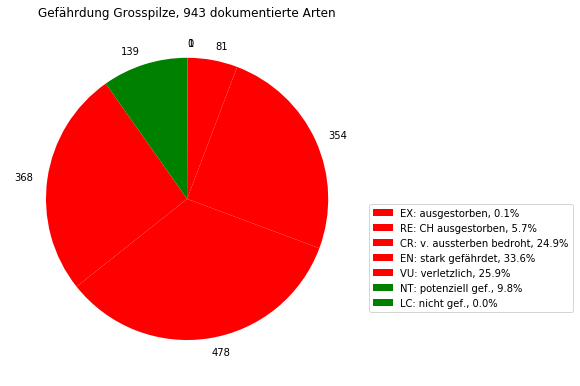

In [55]:
values = [1, 81, 354, 478, 368, 139, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef."]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Grosspilze, 943 dokumentierte Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [22]:
df_m = pd.read_csv("01_source/tabula_ch/tabula_moose.csv")

In [23]:
df_m.rename(columns={"FAMILY":"family","Scientific name": "sc name","CAT":"cat", "Bemerkungen":"bemerkungen"},inplace=True)

df_m.head(1)

,family,sc name,cat,Kriterien IUCN,NHV,bemerkungen
0,Hornmoose – Anthocerotae,Anthoceros agrestis Paton,LC,NaN,NaN,abhängig von ökologischen Ausgleichsmassnahmen


In [24]:
df_m.pop("NHV")
df_m.pop("family")
df_m.pop("Kriterien IUCN")
df_m.pop("bemerkungen")


df_m.head(1)

,sc name,cat
0,Anthoceros agrestis Paton,LC


In [25]:
df_m['einteilung'] = 'Pflanzen'
df_m['untergruppe'] = 'Moose'


df_m.head(1)

,sc name,cat,einteilung,untergruppe
0,Anthoceros agrestis Paton,LC,Pflanzen,Moose


In [38]:
len (df_m)

1153

In [39]:
df_pflanzen= df_gf.append([df_epf, df_aa, df_erf, df_p, df_m])

/Users/priskawa/.virtualenvs/dataviz/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [40]:
df_pflanzen.head(5)

,Bemerkungen,CAT,Criteria,Deutscher Name,FAMILY,GENUS,GROUP,ID_ISFS,SPECIES SSP,Scientific name,cat,einteilung,sc name,untergruppe
0,NaN,LC,NaN,Tanne,Pinaceae,Abies,Gymnosperma,100.0,alba,Abies alba,NaN,NaN,NaN,NaN
1,NaN,LC,NaN,Feld-Ahorn,Sapindaceae,Acer,Dicotyledones,300.0,campestre,Acer campestre,NaN,NaN,NaN,NaN
2,NaN,LC,NaN,Schneeballblättriger Ahorn,Sapindaceae,Acer,Dicotyledones,600.0,opalus,Acer opalus,NaN,NaN,NaN,NaN
3,NaN,LC,NaN,Spitz-Ahorn,Sapindaceae,Acer,Dicotyledones,700.0,platanoides,Acer platanoides,NaN,NaN,NaN,NaN
4,NaN,LC,NaN,Berg-Ahorn,Sapindaceae,Acer,Dicotyledones,800.0,pseudoplatanus,Acer pseudoplatanus,NaN,NaN,NaN,NaN


In [41]:
len(df_pflanzen)

5836

In [31]:
df_pflanzen["cat"].value_counts()

LC        2408
VU        1244
NT         743
EN         711
CR         297
DD         260
RE          88
NE          60
CR(PE)      19
Kat.         2
CR           1
EX           1
Name: cat, dtype: int64

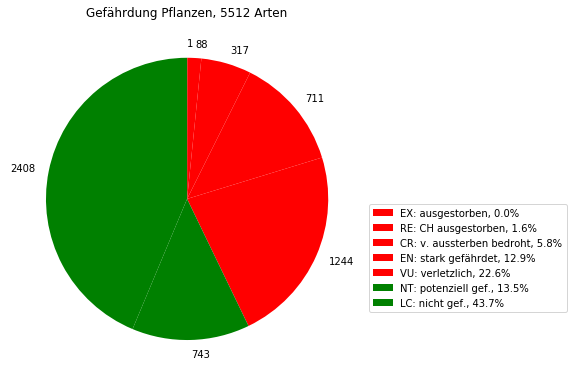

In [33]:
values = [1, 88, 317, 711, 1244, 743, 2408]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef."]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Pflanzen, 5512 dokumentierte Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()

In [ ]:
#df_neu = df.copy()

df['stamm'] = 'Pflanze'

df.columns = ['id', '2', '3']

"""
df = df[[
    'stamm',
    'GROUP',
    'FAMILY',
    'GENUS',
    'SPECIES SSP',
    'Deutscher Name',
    'CAT',
    'Bemerkungen'
    
]]
"""

df.head()